Ladataan tarvittavat kirjastot:

> pandas; matematiikkakirjasto - https://pandas.pydata.org/

> numpy; toinen matematiikkakirjasto - https://numpy.org/doc/

> matplotlib; visualisointikirjasto - https://matplotlib.org/

> seaborn; visualisointikirjasto - https://seaborn.pydata.org/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dat = pd.read_csv("https://raw.githubusercontent.com/rerkki/metropolia/master/hytelevea_ihme.csv", encoding='latin-1')

dat[0:10] #tulostetaan otsikko ja ensimmäinen rivi tarkistuksen vuoksi


,Kayttajanimi,Minulle jaa riittavasti aikaa harrastuksille tyon/koulun ohella.,Herasin aamulla virkeana.,Pidan paivittain yhteytta minulle tarkeisiin ihmisiin.,Liikuin eilen tavoitteiden mukaisesti.,Naen lahes paivittain ihmisia kasvokkain.,Ruoka tuo minulle mielihyvaa.,Saannollinen liikunta ja terveellinen ruoka ovat minulle tarkeita.,Soin tanaan kunnon aamupalan.,Nukun riittavasti oisin.,Kavin eilen ulkoilemassa ja liikuin riittavasti.,Pidan itsestani.,Menin eilen nukkumaan sopivaan aikaan.,Minulle tulee 10 000 askelta useammin kuin 5 paivana viikossa.,Sain eilen tarpeeksi fyysista laheisyytta.,Tykkaan omasta ulkonaostani.,Olen mielestani nahnyt ystaviani/sukulaisia kuluneen kuukauden aikana kasvotusten tarpeeksi.,Kaverini on soittanut minulle kuluneen viikon aikana.,Kayn ulkona paivittain,Soin eilen hyvaa ruokaa,"Arjessani on selkea rytmi tyon/opiskelun, ruokailun, unen ja liikunnan suhteen.",Tein eilen jotain mieluista.,Minulla on riittavasti aikaa hemmotella itsea.,Olen ollut kavereihin yhteydessa tarpeeksi usein kuluneen viikon aikana.
0,1500,3.0,2.0,1.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,1.0,4.0,1.0,2.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,2.0
1,7469,2.0,2.0,4.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7968,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,4.0
3,9253,4.0,5.0,4.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,3.0,4.0,2.0,2.0,3.0,2.0,2.0,3.0,5.0,5.0,5.0,2.0,2.0
4,21084,4.0,2.0,1.0,1.0,5.0,5.0,4.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,NaN,5.0,2.0,2.0,5.0,4.0,2.0
5,34725,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,2.0,3.0,3.0,2.0,5.0,4.0,NaN,NaN,3.0,4.0
6,123098,2.0,3.0,3.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,5.0,4.0,3.0,3.0,5.0,5.0,4.0,4.0,4.0,2.0
7,145789,5.0,2.0,5.0,2.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,2.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0
8,222426,5.0,4.0,4.0,1.0,5.0,2.0,5.0,5.0,2.0,2.0,3.0,4.0,NaN,NaN,3.0,1.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
9,290520,4.0,2.0,4.0,2.0,2.0,4.0,NaN,NaN,4.0,4.0,4.0,4.0,1.0,1.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN


In [4]:
dat2 = dat.rename(columns={'Minulle jaa riittavasti aikaa harrastuksille tyon/koulun ohella.': 'K1', 
                      'Herasin aamulla virkeana.': 'K2',
                      'Pidan paivittain yhteytta minulle tarkeisiin ihmisiin.': 'K3',
                      'Liikuin eilen tavoitteiden mukaisesti.': 'K4',
                      'Naen lahes paivittain ihmisia kasvokkain.': 'K5',
                      'Ruoka tuo minulle mielihyvaa.': 'K6',
                      'Saannollinen liikunta ja terveellinen ruoka ovat minulle tarkeita.': 'K7',
                      'Soin tanaan kunnon aamupalan.': 'K8'})

dat2[0:10] #tulostetaan otsikko ja ensimmäinen rivi tarkistuksen vuoksi


,Kayttajanimi,K1,K2,K3,K4,K5,K6,K7,K8,Nukun riittavasti oisin.,Kavin eilen ulkoilemassa ja liikuin riittavasti.,Pidan itsestani.,Menin eilen nukkumaan sopivaan aikaan.,Minulle tulee 10 000 askelta useammin kuin 5 paivana viikossa.,Sain eilen tarpeeksi fyysista laheisyytta.,Tykkaan omasta ulkonaostani.,Olen mielestani nahnyt ystaviani/sukulaisia kuluneen kuukauden aikana kasvotusten tarpeeksi.,Kaverini on soittanut minulle kuluneen viikon aikana.,Kayn ulkona paivittain,Soin eilen hyvaa ruokaa,"Arjessani on selkea rytmi tyon/opiskelun, ruokailun, unen ja liikunnan suhteen.",Tein eilen jotain mieluista.,Minulla on riittavasti aikaa hemmotella itsea.,Olen ollut kavereihin yhteydessa tarpeeksi usein kuluneen viikon aikana.
0,1500,3.0,2.0,1.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,1.0,4.0,1.0,2.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,2.0
1,7469,2.0,2.0,4.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7968,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,4.0,4.0,3.0,4.0,5.0,5.0,5.0,3.0,4.0,4.0
3,9253,4.0,5.0,4.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,3.0,4.0,2.0,2.0,3.0,2.0,2.0,3.0,5.0,5.0,5.0,2.0,2.0
4,21084,4.0,2.0,1.0,1.0,5.0,5.0,4.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0,2.0,2.0,NaN,5.0,2.0,2.0,5.0,4.0,2.0
5,34725,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,2.0,3.0,3.0,2.0,5.0,4.0,NaN,NaN,3.0,4.0
6,123098,2.0,3.0,3.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,5.0,4.0,3.0,3.0,5.0,5.0,4.0,4.0,4.0,2.0
7,145789,5.0,2.0,5.0,2.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,2.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,4.0,5.0
8,222426,5.0,4.0,4.0,1.0,5.0,2.0,5.0,5.0,2.0,2.0,3.0,4.0,NaN,NaN,3.0,1.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
9,290520,4.0,2.0,4.0,2.0,2.0,4.0,NaN,NaN,4.0,4.0,4.0,4.0,1.0,1.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN


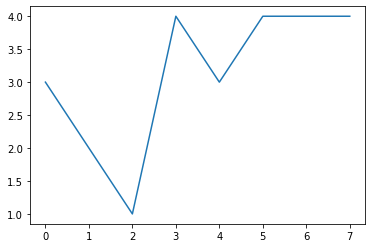

In [5]:
dat3 = dat2.T
dat3

X = list(range(0,8))
Y = [dat3.iat[1,0], dat3.iat[2,0], dat3.iat[3,0], dat3.iat[4,0], dat3.iat[5,0], dat3.iat[6,0], dat3.iat[7,0], dat3.iat[8,0]]

plt.plot(X,Y)


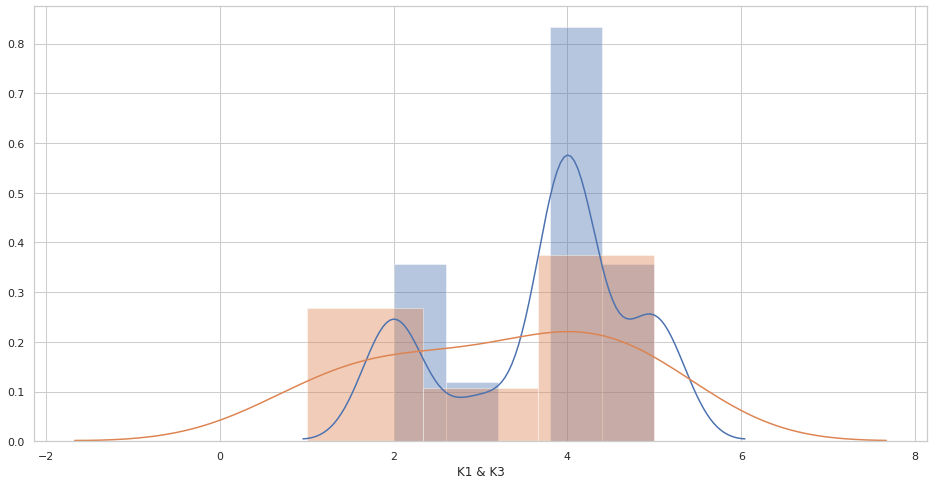

In [6]:
sns.set(style="whitegrid", rc={'figure.figsize':(16,8)})
ax1 = sns.distplot(dat2.K1)
ax2 = sns.distplot(dat2.K3)
plt.xlabel("K1 & K3")
plt.show()


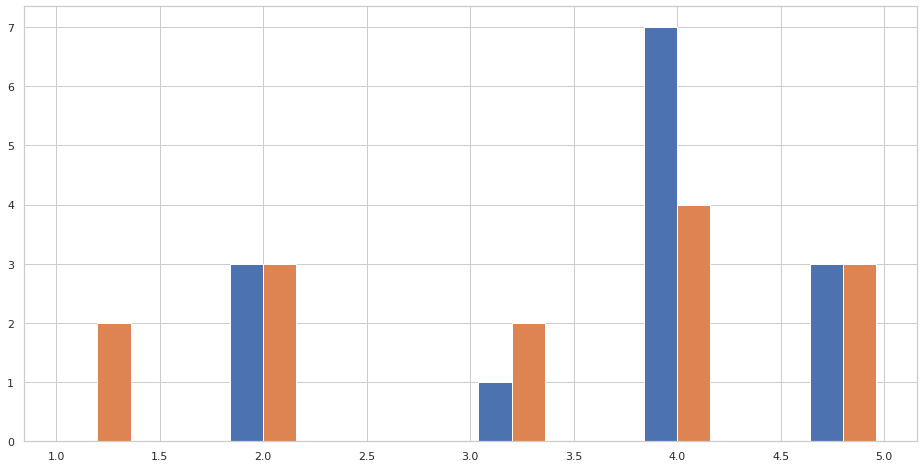

In [7]:
plt.hist([dat2.K1, dat2.K3])
plt.show()

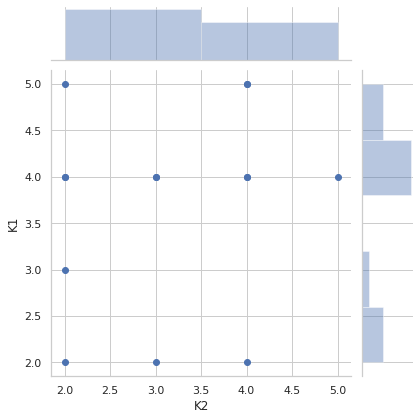

In [8]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,12)})

ax = sns.jointplot(x=dat2.K2, y=dat2.K1);

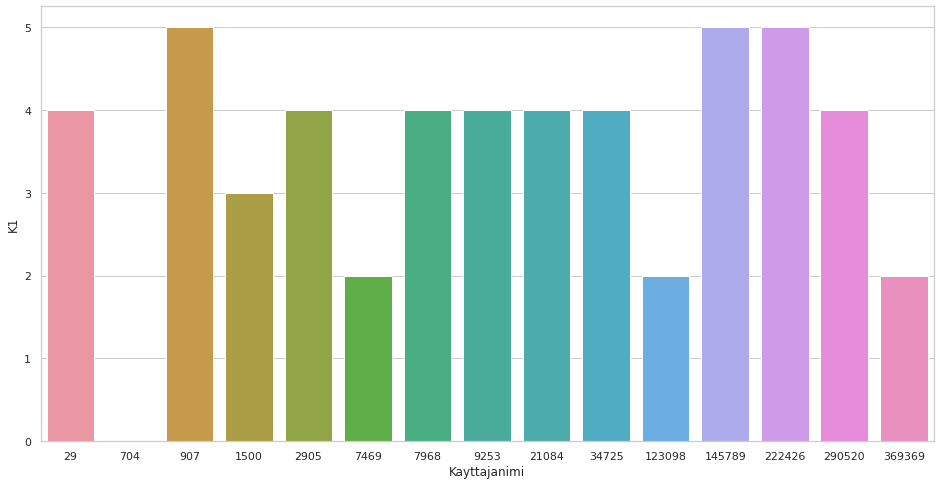

In [10]:
sns.set(style="whitegrid", rc={'figure.figsize':(16,8)})

ax = sns.barplot(x=dat.Kayttajanimi, y=dat2.K1, data=dat2)

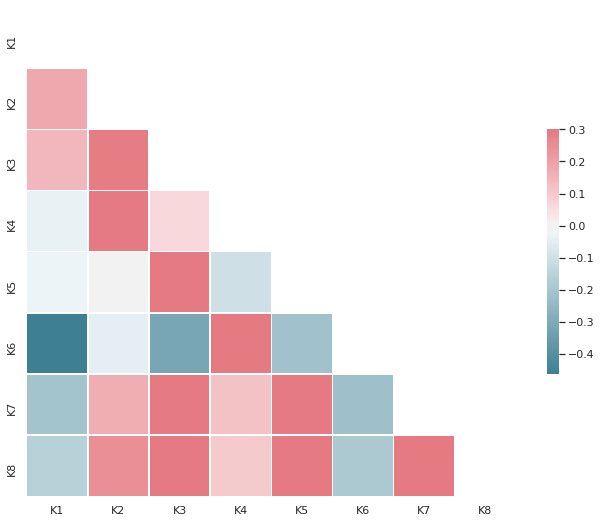

In [11]:
dat = dat2[['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8']]

corr = dat.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

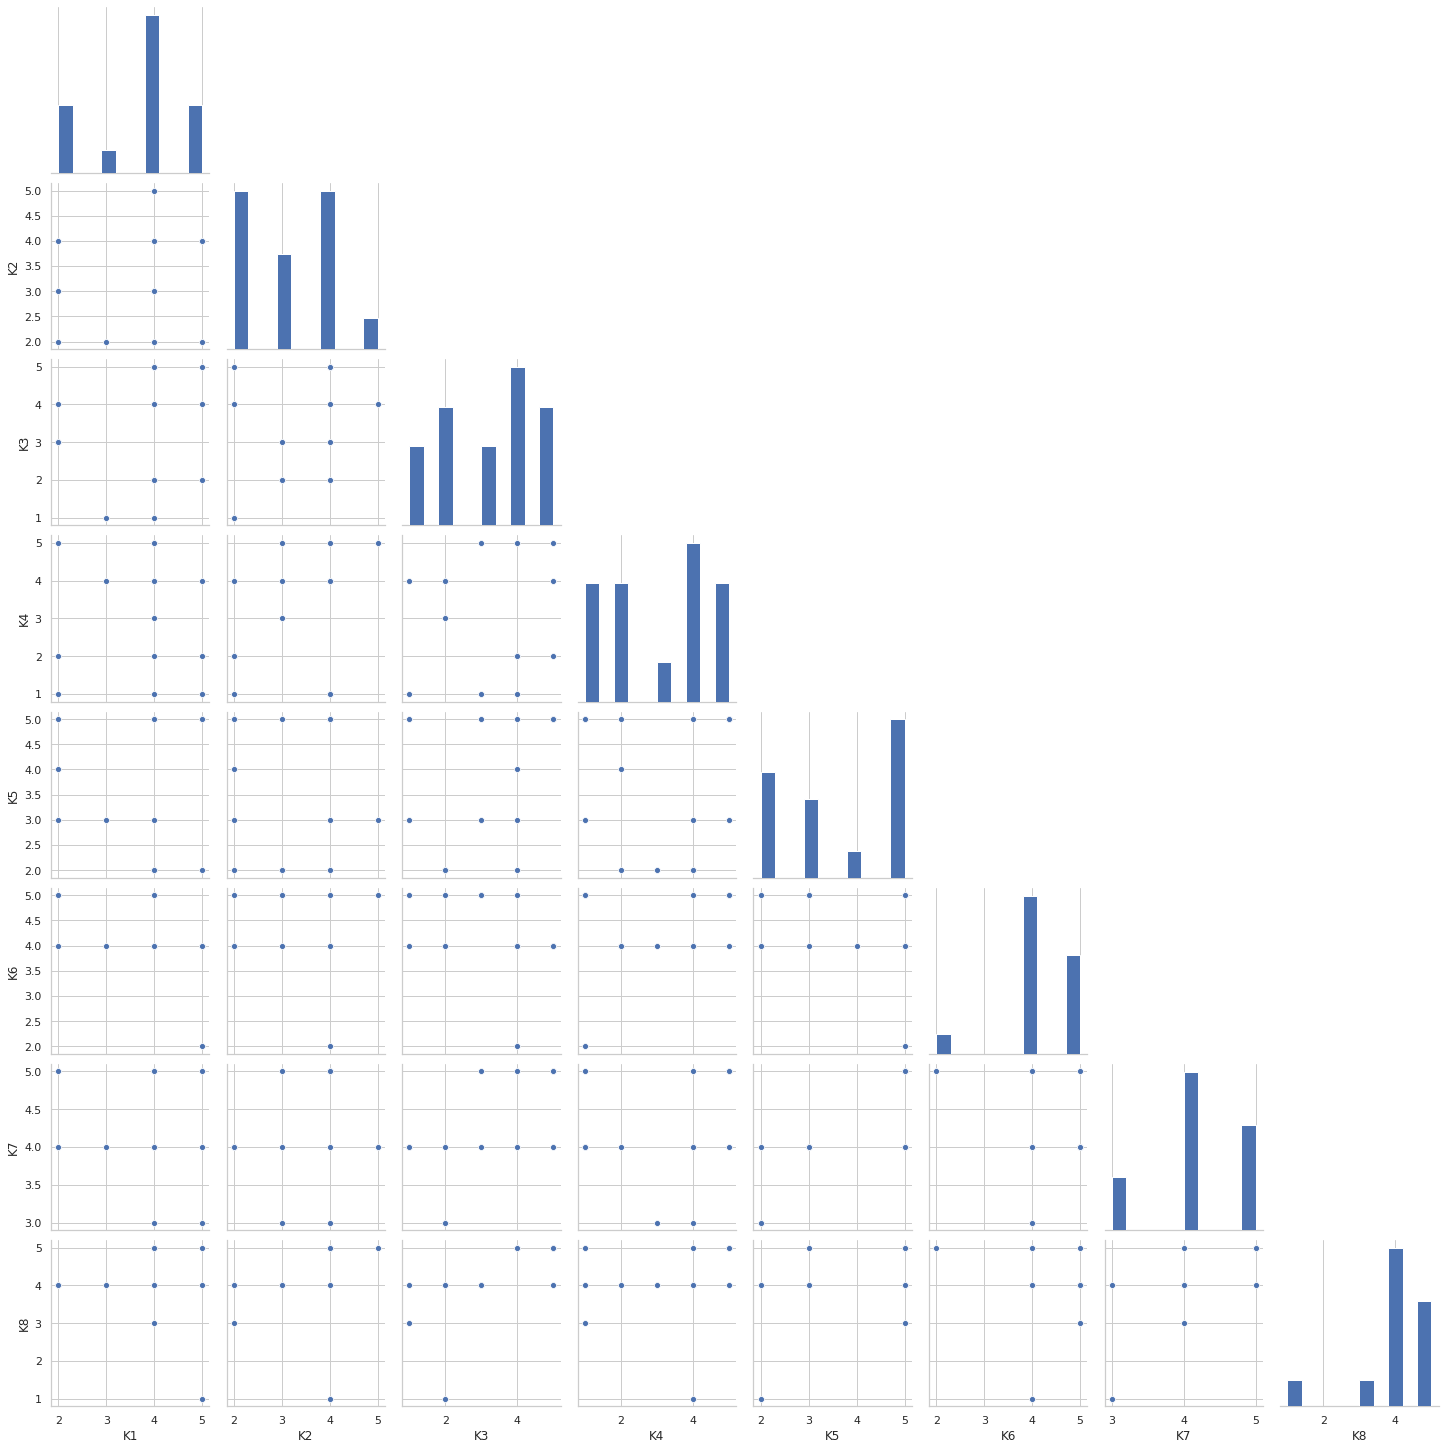

In [12]:
sns.pairplot(dat, corner = True)